# DSCI100 Group32 Project Proposal

## Title: Predicting Student Exam Performance 

##### Authors: Xue Wang, Renee Li, Selina Wang

## Introduction:

In this study, we will be exploring and predicting students’ exam performance about Electrical DC Machines based on their study time. The question we will try to answer with our project is: What will a student’s exam performance be based on their study time? In our project, we will be using the User Knowledge Modeling Data Set. In the chosen dataset, there are a total of 5 variables observed about students, in addition to the classified knowledge level of user (UNS): 

* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects

These variables were drawn from students’ learning-related activities on the web. The data was also already pre-divided into training and testing subsets.


In [ ]:
#The library we need for reading and analyzing the dataset.
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

#### Reading the Data

In [12]:
# We are reading the dataset from the online data folder.
# The data_1 means the training data selected from the sheet 2.
# The data_2 means the testing data selected from the sheet 3.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
data_1 <- read_excel("data.xls", sheet = 2) 
data_2 <- read_excel("data.xls", sheet = 3)
data_1
data_2

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low,NA,NA,NA
0.66,0.68,0.81,0.57,0.57,Middle,NA,NA,NA
0.68,0.64,0.79,0.97,0.24,Middle,NA,NA,NA


* STG: the degree of study time for goal object materials
* SCG: the degree of repetition number of user for goal object materials 
* STR: the degree of study time of user for related objects with goal object
* LPR: the exam performance of user for related objects with goal object
* PEG: the exam performance of user for goal objects
* UNS : The knowledge level of user.

#### Determing the Predictor(s) and the Explanatory Variable(s).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



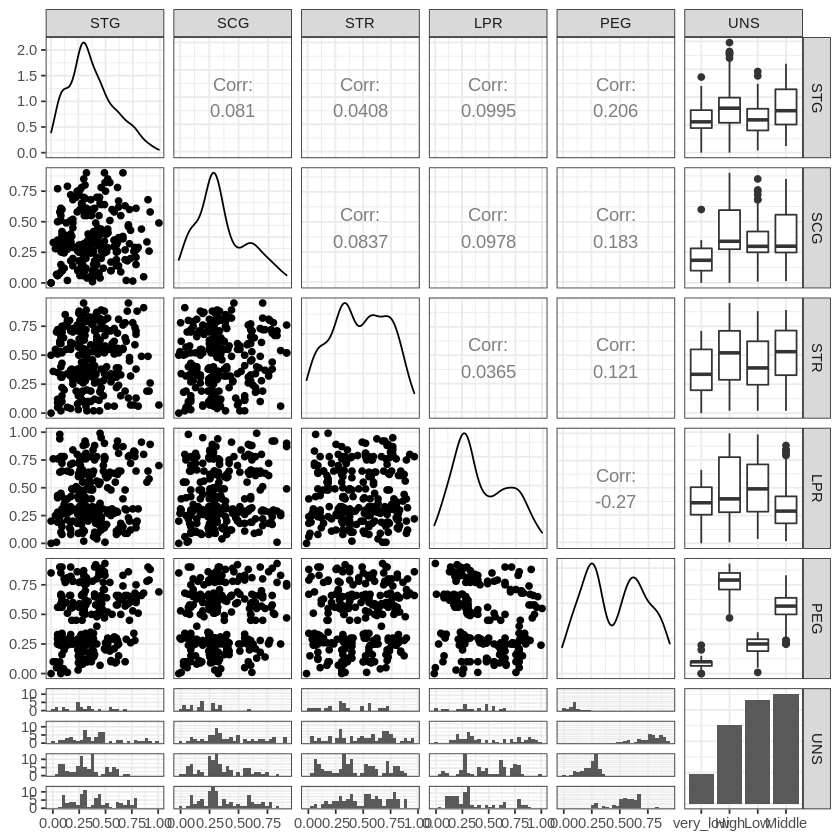

In [24]:
ggpairs(user_training)+theme_bw()

To choose the variables we wish to use as predictors, we compared the four variables to PEG (exam performance) using a ggpairs visualization.

Although LPR has the highest correlation coefficient, it is too similar to PEG for the purposes of our research. It would be beneficial for us to observe the relationship between the variable with the second highest coefficient (STG) and PEG instead.

Therefore, the predictor we have chosen to use in our regression will be STG. 

#### Cleaning and Wrangling the Data

In [25]:
# We are arranging the data to a tidy data format.


# The training data that we need to use.
user_training <-data_1 %>%
select(STG,PEG) 

user_training

#The testing data that we need to use.
user_testing <-data_2 %>%
select(STG,PEG)


user_testing

# user_data <- rbind(user_training,user_testing)
# user_data

STG,PEG
<dbl>,<dbl>
0.00,0.00
0.08,0.90
0.06,0.33
⋮,⋮
0.54,0.77
0.50,0.26
0.66,0.74


STG,PEG
<dbl>,<dbl>
0.00,0.05
0.05,0.14
0.08,0.85
⋮,⋮
0.56,0.32
0.66,0.57
0.68,0.24


#### Summarizing the Data

In [26]:
#the means of the predictor and explanatory variable plan to use in analysis.
means <- user_training%>%
map_df(mean,na.rm= TRUE)

means

STG,PEG
<dbl>,<dbl>
0.3711473,0.4585388


In [37]:
#how many rows have missing data
NA_STG_train<-sum(is.na(user_training$STG))
NA_STG_train

NA_PEG_train<-sum(is.na(user_training$PEG))
NA_PEG_train

NA_STG_test<-sum(is.na(user_testing$STG))
NA_STG_test

NA_PEG_test<-sum(is.na(user_testing$PEG))
NA_PEG_test

[1] 0

[1] 0

[1] 0

[1] 0

We checked both STG and PEG column. There is no missing data in both of STG and PEG column in training and testing dataset.

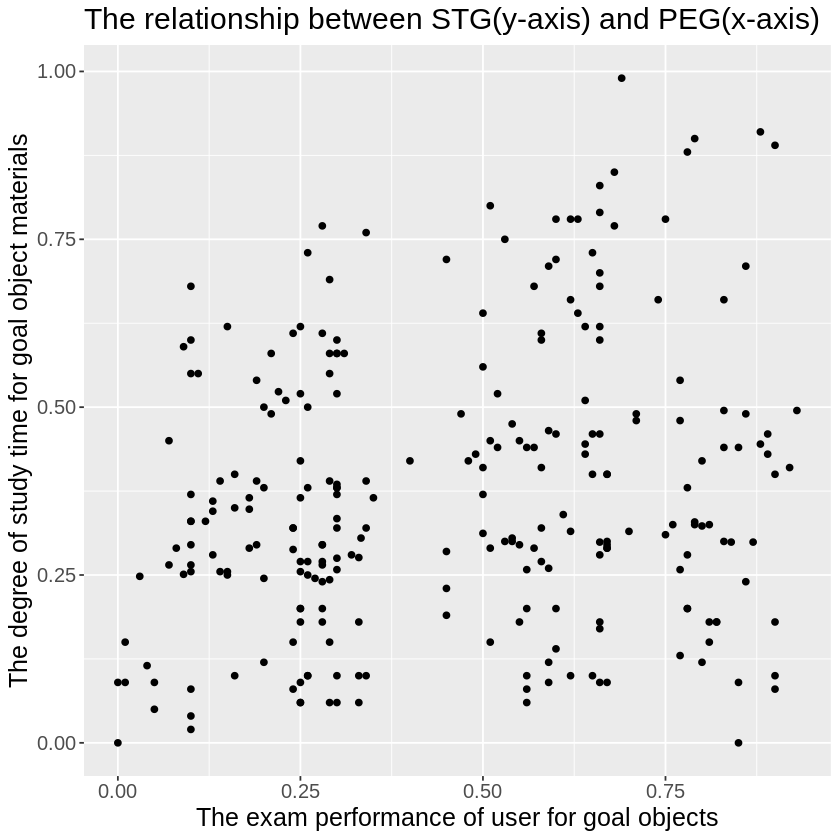

In [39]:
graph1 <- user_training %>%
ggplot(aes(y=STG, x=PEG))+ 
geom_point()+
# geom_smooth(method = "lm",se = FALSE)+
labs(x = "The exam performance of user for goal objects" , y = "The degree of study time for goal object materials", title = "The relationship between STG(y-axis) and PEG(x-axis)")+
theme(text=element_text(size=15))
graph1

### Methods

We will be using regression to predict a student’s exam performance based on their study time. Since we are predicting a numerical value instead of a categorical value, we must use regression to evaluate and create a prediction.We will train our regression with our training data and assess its accuracy with our testing data.

After plotting PEG against STG, we can also see that the data points do not follow a clear or direct relationship. From what we can see so far, k-nn regression seems to be the better choice as it allows for more flexibility, but we will test both the accuracies of k-nn and linear regression, and compare to find the best approach. 

To visualize our results, we will plot our predictions as a line using geom_smooth overlaid our testing data to see the relationship between the two.

### Expected Outcomes and Significance

We expect to find a positive, linear relationship between PEG and STG. As a student spends more time studying, they should perform better. Our findings will help students assess how well they are performing in comparison to the time they are spending studying. This will be beneficial to find the best study methods and learn how to study more efficiently. Some future questions to consider:

* How much time should a student be spending studying to improve exam performance?
* How do other factors (such as repetition, knowledge level, etc.) contribute to exam performance?